# Random_Forest_Algorithm

Importing Library as follows

In [1]:
import pandas as pd
import numpy as np

Importing dataset form local host and get dummy variables

In [2]:
Cancer = pd.read_csv("BreastCancer.csv")
Cancer.head()


,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [3]:
X = Cancer[Cancer.columns[1:10]]
y = Cancer[Cancer.columns[10]]

Import the necessary modules

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Create training and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)



In [7]:
clf = RandomForestClassifier(random_state=2020,max_depth=4)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [8]:
print(confusion_matrix(y_test, y_pred))

[[134   4]
 [  8  64]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Benign       0.94      0.97      0.96       138
   Malignant       0.94      0.89      0.91        72

    accuracy                           0.94       210
   macro avg       0.94      0.93      0.94       210
weighted avg       0.94      0.94      0.94       210



In [10]:
print(accuracy_score(y_test,y_pred))

0.9428571428571428


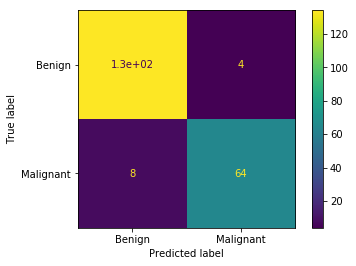

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,display_labels=['Benign','Malignant'])

***ROC***

Import necessary modules

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

Compute predicted probabilities: y_pred_prob

In [14]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

Grid Search CV

In [17]:
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

In [18]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42)

from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=2021)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit(X,y)

/Users/sujit.deokar/Documents/python_env/Rubiscape_stage/lib/python3.5/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

Best Parameters

In [19]:
print(cv.best_params_)

print(cv.best_score_)

{'min_samples_leaf': 5, 'min_samples_split': 5, 'max_depth': 6}
0.9909495451310004


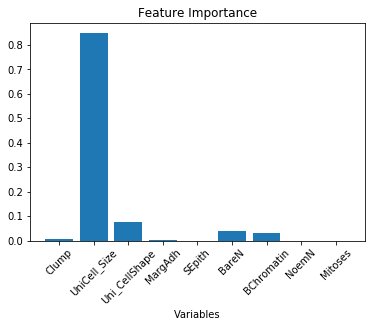

In [35]:
import matplotlib.pyplot as plt

best_model.feature_importances_

ind = np.arange(9)
plt.bar(ind,best_model.feature_importances_)
plt.xticks(ind,(X.columns),rotation=45)
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()